## Graphical Properties of Polyrhythms

Polyrhythms are contrasting rhythms played simultaneously.  For the purposes of this endeavor, we will focus on polyrhythms that happen within the same time signature.  How can we establish a mathematical and computational basis to make sure polyrhythms follow the same time signature?  Rhythms within a measure can be modeled using cyclic graphs due to the fact that beat counts restart at the beginning of every measure.  This will be a case study in ensuring that triplets and eighth rhythms both follow 4/4 time graphically.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx


The beat counts of eigth beats in 4/4 time in a given measure can be modeled using a cycle graph $C_{8}$.  The edges have been colored red, blue, green, and yellow to represent the 1st beat count, 2nd beat count, 3rd beat count, 4th beat count, respectively.  


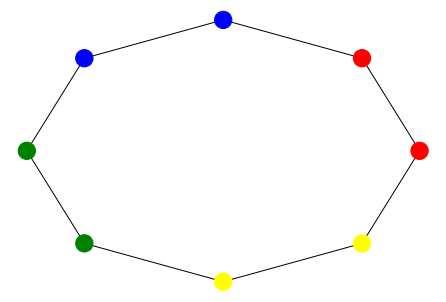

In [2]:
H = nx.cycle_graph(8)
pos_2 = nx.circular_layout(H)
color_map_2=[]
for node in H:
    if node == 0 or node == 1:
        color_map_2.append('red')
    elif node == 2 or node == 3:
        color_map_2.append('blue')
    elif node == 4 or node ==5:
        color_map_2.append('green')
    elif node == 6 or node == 7:
        color_map_2.append('yellow')
nx.draw(H, pos_2, node_color=color_map_2)

The beat counts of triplets in 4/4 time in a given measure can be modeled using a cycle graph $C_{12}$ (4 sets of triplets --> 4 * 3 = 12).  The edges have been colored red, blue, green, and yellow to represent the 1st beat count, 2nd beat count, 3rd beat count, 4th beat count, respectively.  


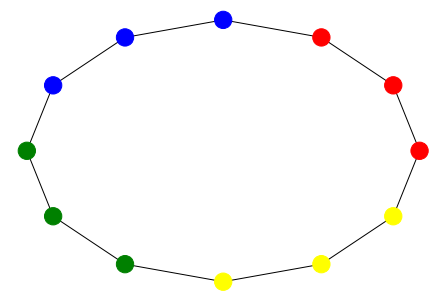

In [3]:
I = nx.cycle_graph(12)
pos_3 = nx.circular_layout(I)
color_map_3=[]
for node in I:
    if node <= 2:
        color_map_3.append('red')
    elif node >=3 and node <=5:
        color_map_3.append('blue')
    elif node >=6 and node <=8:
        color_map_3.append('green')
    elif node >=9 and node <=11:
        color_map_3.append('yellow')
nx.draw(I, pos_3, node_color=color_map_3)

This however, presents a problem because we know that the eighth beats and triplets follow the same time signature, but, within the constraints of rhythm, there exists no graph homorphism $f: C_{12} \rightarrow C_{8}$ where we can "evenly" map vertices of the same color in $C_{12}$ and $C_{8}$.  This is due to the fact that triplets and eighth beats  in 4/4 time do not share a common point in time where they coincide with other except at the start of a beat. How do we get around this problem?  

We introduce a third cycle graph $C_{4}$ to represent the standard beat counts of a measure in 4/4 time (quarter notes). The vertices have been colored red, blue, green, and yellow to represent the 1st beat count, 2nd beat count, 3rd beat count, 4th beat count, respectively.  


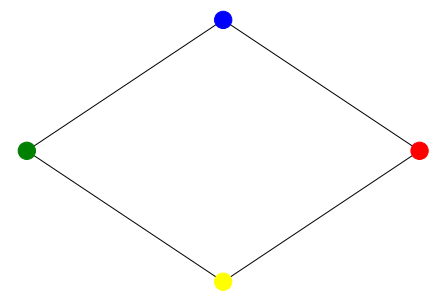

In [4]:
G = nx.cycle_graph(4)
pos_1 = nx.circular_layout(G)
color_map_1=[]
for node in G:
    if node == 0:
        color_map_1.append('red')
    elif node == 1:
        color_map_1.append('blue')
    elif node == 2:
        color_map_1.append('green')
    elif node == 3:
        color_map_1.append('yellow')
nx.draw(G, pos_1, node_color=color_map_1)

The introduction of $C_{4}$ makes this problem a lot easier to solve.  Within the constraints of rhythm, we can create a homomorphism $f: C_{12} \rightarrow C_{4}$ to map vertices of the same color, as 1 set of triplets corresponds to 1 quarter beat.  Moreover, we can create another graph homorphism $f: C_{8} \rightarrow C_{4}$ to map vertices of the same color, as 2 eighth beats correspond to 1 quarter beat.  It is also worth nothing that the greatest common factor (GCF) of 12 and 8 is 4. In a sense, we can use $C_{4}$ as a means of interfacing between the contrasting rhythms modeled in $C_{12}$ and $C_{8}$. $C_{4}$ essentially "anchors" $C_{8}$ and $C_{12}$ to the same time signature.

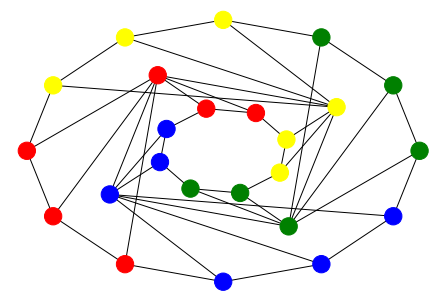

In [5]:
A = nx.Graph()
B = nx.Graph()
C = nx.Graph()
nodes_A = ['t_1','t_2','t_3', 't_4', 't_5', 't_6', 't_7', 't_8', 't_9', 't_10', 't_11', 't_12']
nodes_B = ['e_1', 'e_2', 'e_3','e_4', 'e_5', 'e_6', 'e_7', 'e_8']
nodes_C = ['q_1','q_2', 'q_3', 'q_4']
edges_A = [('t_1','t_2'), ('t_2','t_3'), ('t_3', 't_4'), ('t_4', 't_5'), ('t_5', 't_6'), ('t_6', 't_7'),('t_7', 't_8'), ('t_8', 't_9'), ('t_9', 't_10'), ('t_10', 't_11'), ('t_11', 't_12'), ('t_12', 't_1')]
edges_B = [ ('e_1','e_2'), ('e_2','e_3'), ('e_3', 'e_4'), ('e_4', 'e_5'), ('e_5', 'e_6'), ('e_6', 'e_7'),('e_7', 'e_8'), ('e_8', 'e_1')]
edges_C = [('q_1','q_2'), ('q_2','q_3'), ('q_3', 'q_4'), ('q_4', 'q_1')]
A.add_nodes_from(nodes_A)
A.add_edges_from(edges_A)
B.add_nodes_from(nodes_B)
B.add_edges_from(edges_B)
C.add_nodes_from(nodes_C)
C.add_edges_from(edges_C)      
D = nx.compose(A,B)
D = nx.compose(D,C)
additional_edges = [('q_1','t_1'), ('q_1','t_2'),('q_1','t_3'),('q_2','t_4'), ('q_2','t_5'),('q_2','t_6'), ('q_3','t_7'), ('q_3','t_8'),('q_3','t_9'),('q_4','t_10'), ('q_4','t_11'),('q_4','t_12'),
       ('q_1','e_1'), ('q_1','e_2'),('q_2','e_3'), ('q_2','e_4'),('q_3','e_5'), ('q_3','e_6'),('q_4','e_7'), ('q_4','e_8')]
edge_list = list(D.edges) + additional_edges
D.add_edges_from(edge_list)
color_map_D =[]
for node in D:
    if node == 't_1' or node == 't_2' or node == 't_3' or node == 'e_1' or node == 'e_2' or node == 'q_1':
        color_map_D.append('red')
    elif node == 't_4' or node == 't_5' or node == 't_6' or node == 'e_3' or node == 'e_4' or node == 'q_2':
        color_map_D.append('blue')
    elif node == 't_7' or node == 't_8' or node == 't_9' or node == 'e_5' or node == 'e_6' or node == 'q_3':
        color_map_D.append('green')
    elif node == 't_10' or node == 't_11' or node == 't_12' or node == 'e_7' or node == 'e_8' or node == 'q_4':
        color_map_D.append('yellow')
shells = [nodes_B, nodes_C, nodes_A]
pos_7 = nx.shell_layout(D, shells)
nx.draw(D, pos_7, node_color = color_map_D)

Above is a graphical representation of my solution, where $C_{12}$,$C_{8}$, and $C_{4}$ are imposed on the same diagram, with additional edges generated to represent the homorphic mappings between $C_{12}$ and $C_{4}$ & $C_{8}$ and $C_{4}$.